___________
## Plot ZIP codes with highlighted overlay of selected ZIP codes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/zipcode_database_condensed.csv')

In [3]:
df.head()

,Zipcode,City,State,Lat,Long
0,7675,WESTWOOD,NJ,40.98,-74.03
1,7677,WOODCLIFF LAKE,NJ,41.02,-74.05
2,7885,WHARTON,NJ,40.89,-74.58
3,7981,WHIPPANY,NJ,40.82,-74.41
4,7999,WHIPPANY,NJ,40.82,-74.41


In [4]:
# investigate choropleth:  folium, mapclassify, cartopy

In [5]:
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

In [6]:
sf_df = pd.read_csv('./Data/sf_county_zips.csv')

In [7]:
sf_list = list(sf_df['zip'])

In [21]:
mich_list = list(df[df['State'] == 'IA']['Zipcode'])

In [22]:
cont_df = df[(df['Lat'] > bottom) & 
                     (df['Lat'] < top) & 
                     (df['Long'] < right) & 
                     (df['Long'] > left)]

In [23]:
cont_df.reset_index(drop=True, inplace=True)

In [24]:
cont_df.head()

,Zipcode,City,State,Lat,Long
0,7675,WESTWOOD,NJ,40.98,-74.03
1,7677,WOODCLIFF LAKE,NJ,41.02,-74.05
2,7885,WHARTON,NJ,40.89,-74.58
3,7981,WHIPPANY,NJ,40.82,-74.41
4,7999,WHIPPANY,NJ,40.82,-74.41


In [25]:
cont_df['selected'] = 0

C:\Users\bdmir\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
cont_df.head()

,Zipcode,City,State,Lat,Long,selected
0,7675,WESTWOOD,NJ,40.98,-74.03,0
1,7677,WOODCLIFF LAKE,NJ,41.02,-74.05,0
2,7885,WHARTON,NJ,40.89,-74.58,0
3,7981,WHIPPANY,NJ,40.82,-74.41,0
4,7999,WHIPPANY,NJ,40.82,-74.41,0


In [27]:
for i, zipcode in enumerate(cont_df['Zipcode']):
    if zipcode in mich_list:
        cont_df.loc[i,'selected'] = 1
        

C:\Users\bdmir\Anaconda3\envs\dsi\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


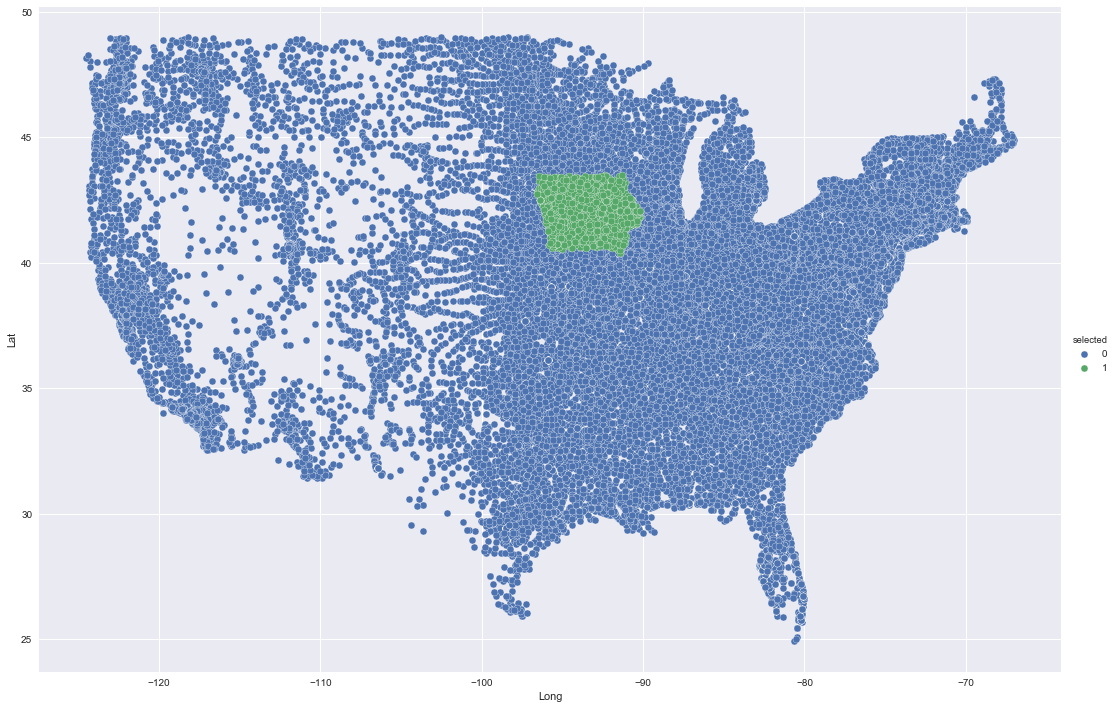

In [28]:
sns.pairplot(x_vars=['Long'], y_vars=['Lat'], data=cont_df, hue='selected', size=10, aspect=1.5)